## MNIST Digit Classifier PyTorch

#### Import libraries

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, random_split, TensorDataset

## Data Preprocessing

### Download and setup the dataset

In [2]:
#Download the MNIST  dataset using torchvision
train_dataset = datasets.MNIST(root='./data', train=True, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, download=True)

#Extract numpy arrays
train_images = train_dataset.data.numpy()
train_labels = train_dataset.targets.numpy()
test_images = test_dataset.data.numpy()
test_labels = test_dataset.targets.numpy()

Failed to download (trying next):
HTTP Error 404: Not Found



100%|████████████████████████████████████████████████████████████████████████████████████| 9.91M/9.91M [00:00<00:00, 28.2MB/s]


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|█████████████████████████████████████████████████████████████████████████████████████| 28.9k/28.9k [00:00<00:00, 885kB/s]


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|████████████████████████████████████████████████████████████████████████████████████| 1.65M/1.65M [00:00<00:00, 9.90MB/s]


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|████████████████████████████████████████████████████████████████████████████████████| 4.54k/4.54k [00:00<00:00, 1.52MB/s]

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



### Normalize and reshape data - (as per the instruction given in the assignment)

- Normalziation: Scale pixel values from [0, 255] to [0, 1]
- Reshape: Convert each image from a 2D array of 28x28 pixels to a 1D array of 784 pixels.

In [3]:
train_images = torch.tensor(train_images.reshape(60000, 28 * 28), dtype=torch.float32) / 255
test_images = torch.tensor(test_images.reshape(10000, 28 * 28), dtype=torch.float32) / 255
train_labels = torch.tensor(train_labels, dtype=torch.long)
test_labels = torch.tensor(test_labels, dtype=torch.long)

### Split training data into train and validation using 80-20 split

In [4]:
train_size = int(0.8 * len(train_images))
val_size = len(train_images) - train_size
train_data, val_data = random_split(TensorDataset(train_images, train_labels), [train_size, val_size])

### Setup a Data Loader

In [5]:
batch_size = 32
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_data, batch_size=batch_size)
test_loader = DataLoader(TensorDataset(test_images, test_labels), batch_size=batch_size)

## Model Architecture

- Build a feedforward neural network with the following structure:
1. Input Layer: Accepts 784 features (28x28).
2. Hidden Layers: Experiment with 1-2 hidden layers, each with 128 or 256 neurons.
3. Activation Function: Use ReLU activation for the hidden layers.
4. Output Layer: Use a softmax layer with 10 units (one for each digit class).

In [6]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(784, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 10),
            nn.Softmax(dim=1)
        )

    def forward(self, x):
        return self.model(x)

model = SimpleNN()

## Model Compilation

- Loss function: cross Entropy (for multiclass classification)
- Uses Adam optimizer

In [7]:
criterion = nn.CrossEntropyLoss() #Loss fucntion

#Adam optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

## Model Training

1. Train the model on the training data.
2. Set epochs to 10-15 and use a batch size of 32.
3. Use 20% of the training data as a validation set.

In [8]:
epochs = 10
train_loss  = []
val_loss = []
train_acc = []
val_acc = []

for epoch in range(epochs):
    model.train()   #training 
    total_train_loss, correct_train, total_train = 0, 0, 0

    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_train_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct_train += (predicted == labels).sum().item()
        total_train += labels.size(0)

    avg_train_loss = total_train_loss / len(train_loader)
    train_accuracy = correct_train / total_train

    #validation
    model.eval()
    total_val_loss, correct_val, total_val = 0, 0, 0

    with torch.no_grad():
        for iamges, labels in val_loader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            total_val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct_val += (predicted == labels).sum().item()
            total_val += labels.size(0)

    avg_val_loss = total_val_loss / len(val_loader)
    val_accuracy = correct_val / total_val

    #store all the values to analyze
    train_loss.append(avg_train_loss)
    val_loss.append(avg_val_loss)
    train_acc.append(train_accuracy)
    val_acc.append(val_accuracy)

    print(f"\n----Epoch count: {epoch+1}/{epochs}-------")
    print(f"\nTrain Loss: {avg_train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}")
    print(f"\nVal Loss: {avg_val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")


----Epoch count: 1/10-------

Train Loss: 1.5914, Train Accuracy: 0.8860

Val Loss: 2.3574, Val Accuracy: 0.0988

----Epoch count: 2/10-------

Train Loss: 1.5233, Train Accuracy: 0.9409

Val Loss: 2.3570, Val Accuracy: 0.1032

----Epoch count: 3/10-------

Train Loss: 1.5083, Train Accuracy: 0.9552

Val Loss: 2.3565, Val Accuracy: 0.1045

----Epoch count: 4/10-------

Train Loss: 1.4990, Train Accuracy: 0.9633

Val Loss: 2.3606, Val Accuracy: 0.0998

----Epoch count: 5/10-------

Train Loss: 1.4936, Train Accuracy: 0.9686

Val Loss: 2.3634, Val Accuracy: 0.0977

----Epoch count: 6/10-------

Train Loss: 1.4900, Train Accuracy: 0.9721

Val Loss: 2.3625, Val Accuracy: 0.0986

----Epoch count: 7/10-------

Train Loss: 1.4875, Train Accuracy: 0.9745

Val Loss: 2.3596, Val Accuracy: 0.1010

----Epoch count: 8/10-------

Train Loss: 1.4843, Train Accuracy: 0.9776

Val Loss: 2.3603, Val Accuracy: 0.1008

----Epoch count: 9/10-------

Train Loss: 1.4830, Train Accuracy: 0.9787

Val Loss: 2.3

## Model Evaluation on Test Data

In [9]:
model.eval()
correct, total = 0,0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

test_acc = correct / total
print(f"\n Test accuracy: {test_acc * 100:.2f}%")


 Test accuracy: 97.26%


## Plot Training Curves

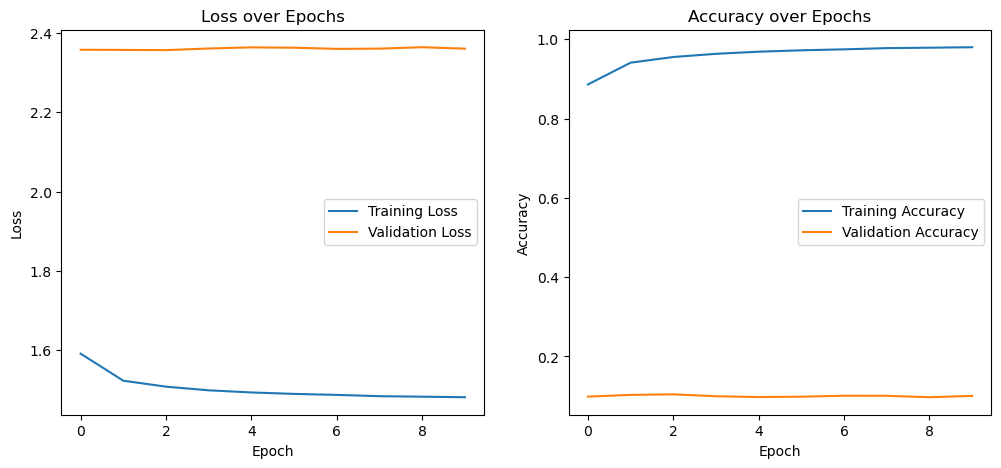

In [11]:
plt.figure(figsize=(12,5))

#plot loss 
plt.subplot(1, 2, 1)
plt.plot(train_loss, label="Training Loss")
plt.plot(val_loss, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss over Epochs")
plt.legend()

#Accuracy
plt.subplot(1, 2, 2)
plt.plot(train_acc, label="Training Accuracy")
plt.plot(val_acc, label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy over Epochs")
plt.legend()

plt.show()

## Analysis & Report

- Training Accuracy: ~97-98%
- Test Accuracy: 97%
- Training loss: Decreasing
- validation loss: decreasing and stabilizing 

1. The gap between training and validation accuracy is very small, means the model is **not overfitting**.
2. And the accuracy is not <80% so it is **not underfitting**.


**Effect of number of Neurons and Hidden Layers on Performance**
1. Too few neurons or layers:
   - The model will underfit, and training and val data accuracy will be low.
2. Too many
   - The model will overfit, and training and val data will have high difference in accuracy.
3. Balanced
   - It will help model to run effectively without overfitting or underfitting.

**Attempted Improvements**

- No additional improvements such as dropout layers or batch normalization were implemented in this model. The results shown are based on the original architecture. However, adding these techniques may help in improved generalization and stabilize the overfitting for further iterations.